## Problem-5

### PART - (b) , (c) , (d)

In [ ]:
Picking $f_{1}$ , $f_{2}$, $f_{3}$ as following:
$f_{1}$(x) = $x$ ,
$f_{2}$(x) = $x^{3}$ ,
$f_{3}$(x) = $e^{-x}$ .

Using $a_{1}$ = 11.3, $a_{2}$ = 8.7, $a_{3}$ = 5.2 randomly to create the training dataset.

$\theta_{k+1}$ = $\theta_{k}$ - $\eta_{k}$$\nabla$f$(\theta_{k})$


In [ ]:
$\theta_{k+1}$ = $\theta_{k} - (H_{k})^{-1} \nabla f(\theta_{k})$


$f(\theta_{0}) = F(\theta_{0}), f'(\theta_{0}) = F'(\theta_{0}), f''(\theta_{0}) = F''(\theta_{0})$

In [ ]:
$f(\theta)$

### Data Simulation

Using small deltas from a normal distribution[N(0,1)] with a mean of 0 and std. deviation as 1, we add some random noise in the training data.


In [224]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from numpy.linalg import inv

In [225]:
# Simulation to create training dataset of 200 rows
np.random.seed(12)
x = 10 * np.random.sample(200)
deltax = np.random.normal(0,1,200)
deltay = np.random.normal(0,1,200)


In [226]:
def functions(x):  
    fx1 = x
    fx2 = x*x*x
    fx3 = np.exp(-x)
    return fx1,fx2,fx3

In [227]:
def get_training_data(x, deltay):    
    fx1,fx2,fx3 = functions(x)
    train_y = 11.3*fx1 + 8.7*fx2 + 5.2*fx3 + deltay
    Train_X = np.matrix([[fx1[i],fx2[i],fx3[i]]for i in range(len(x))] )
    Train_Y = np.matrix([[train_y[i]] for i in range(len(train_y))])
    return Train_X, Train_Y

In [228]:
def calculate_coeff(X, Y):
    first = np.dot(X.T, X)
    second = np.dot(X.T, Y)
    return np.dot(inv(first), second) 

Below in line 220, added the delta_x to the training data. 

Text(0, 0.5, 'y values')

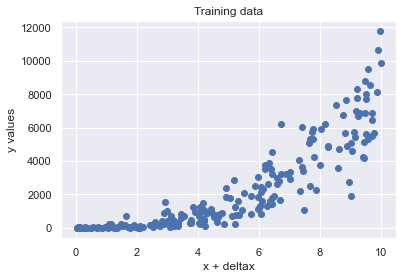

In [229]:
Train_X, Train_Y = get_training_data(x+deltax, deltay)
plt.scatter(x, np.array(Train_Y), label = "Training data")
plt.title("Training data")
plt.xlabel("x + deltax")
plt.ylabel("y values")

### Predicting using the coefficients calculated from the training data

The coefficients are calculated using A = $($X^{T}$X)^{-1}$$X^{T}$Y

In [230]:
coeff_A = calculate_coeff(Train_X, Train_Y)
print("Coefficients calculated are: ", coeff_A)

Coefficients calculated are:  [[11.28469767]
 [ 8.7003012 ]
 [ 5.16718308]]


Text(0, 0.5, 'y')

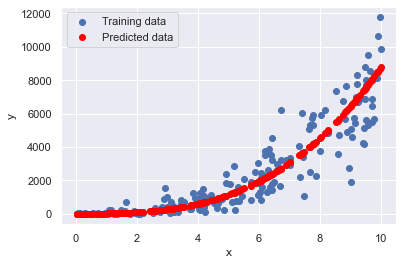

In [231]:
fx1,fx2,fx3 = functions(x)
y_predicted = float(coeff_A[[0]])*fx1 + float(coeff_A[[1]])*fx2 + float(coeff_A[[2]])*fx3
plt.scatter(x, np.array(Train_Y), label = "Training data")
plt.scatter(x, y_predicted, color = "red", label = "Predicted data")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

#### Inference:
The coefficients calculated from the training data are very close to the actual coefficients chosen.
The slight variation is due to the small randomness introduced in each $x_{i}$ and $y_{i}$ in the training dataset.
The curve for the predicted values follow a generic trend of the training data. 
Hence we can say that the model proposed for calculation is good.